In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('adult_with_headers.csv')

In [78]:
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [80]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [81]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [82]:
df[df['workclass'] == ' ?'] 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [83]:
df['occupation'][df['occupation'] == ' ?'] = 'unknown'

C:\Users\Durva\AppData\Local\Temp\ipykernel_7332\3338098610.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['occupation'][df['occupation'] == ' ?'] = 'unknown'
C:\Users\Durva\AppData\Local\Temp\ipykernel_7332\3338098610.py:1: SettingW

In [84]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [85]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [86]:
len(df[df['capital_gain']==0])

29849

In [87]:
len(df[df['capital_loss']==0])

31042

In [88]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [89]:
df['native_country'][df['native_country'] == ' ?'] = 'unknown'

C:\Users\Durva\AppData\Local\Temp\ipykernel_7332\2138655234.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['native_country'][df['native_country'] == ' ?'] = 'unknown'
C:\Users\Durva\AppData\Local\Temp\ipykernel_7332\2138655234.py:1: 

In [90]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [91]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\Durva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AGE')

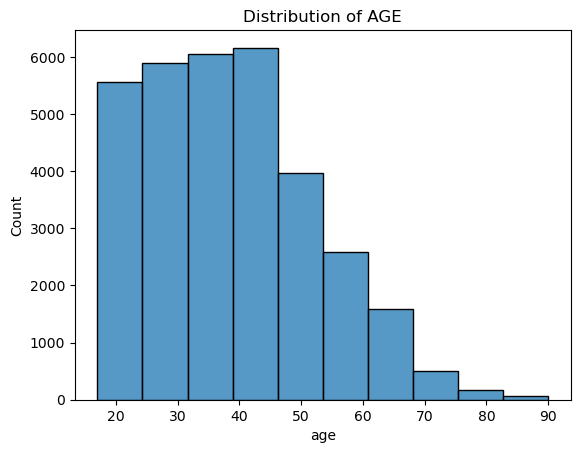

In [92]:
sns.histplot(df['age'], bins = 10)
plt.title('Distribution of AGE')

C:\Users\Durva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of fnlwgt')

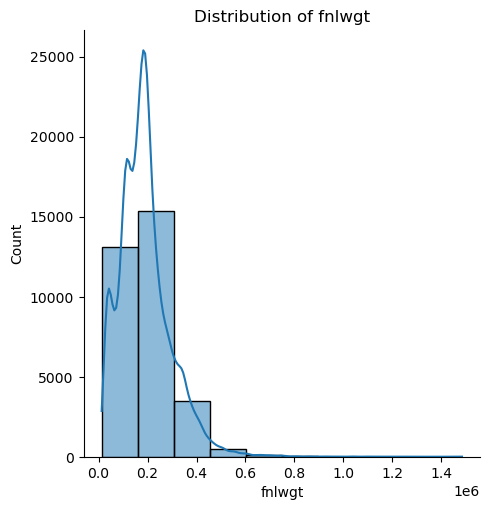

In [93]:
sns.displot(df['fnlwgt'], bins = 10 , kde = True)
plt.title('Distribution of fnlwgt')

C:\Users\Durva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of hours per week')

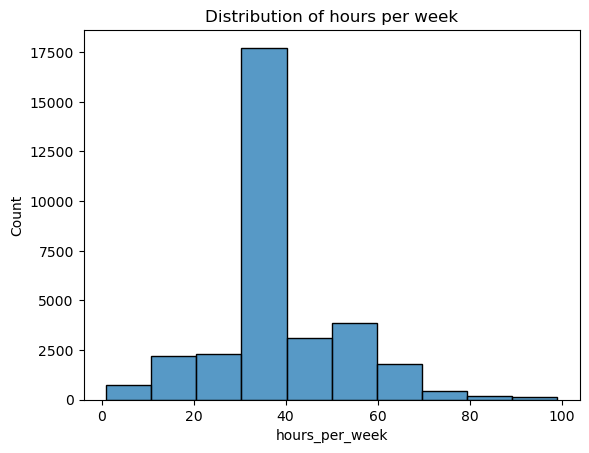

In [94]:
sns.histplot(df['hours_per_week'], bins = 10)
plt.title('Distribution of hours per week')

<Axes: xlabel='income', ylabel='count'>

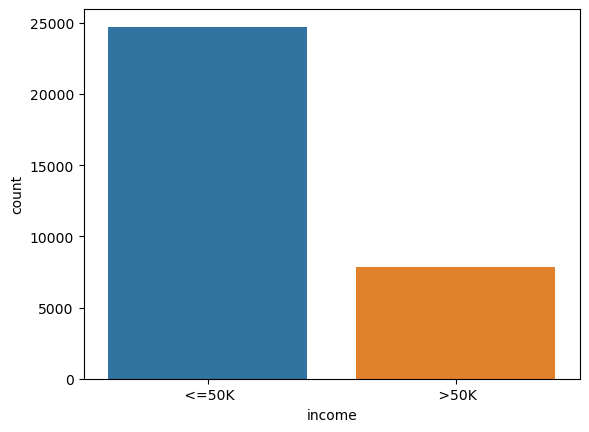

In [95]:
sns.countplot(x='income', data=df)

In [96]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [97]:
df1 = df.copy()

In [98]:
#applying Standard Scaling and Min max scaling to numerical cols
from sklearn.preprocessing import StandardScaler , MinMaxScaler
sc = StandardScaler()
ms = MinMaxScaler()


In [99]:
df.select_dtypes(include=['number']).columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [100]:
#I will be using Standard scaling since there are outliers in the data
columns_to_scale = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [101]:
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [102]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


Standard Scaling transforms features to have a mean of 0 and a standard deviation of 1.
It handles outliers better than Min-Max Scaling because the scaling is based on the standard deviation, which is less affected by extreme values.

In [103]:
object_col = df.select_dtypes(include = object).columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [104]:
for col in object_col :
    print(f'No. of Unique Entries in {col} is {df[col].nunique()}.')

No. of Unique Entries in workclass is 9.
No. of Unique Entries in education is 16.
No. of Unique Entries in marital_status is 7.
No. of Unique Entries in occupation is 15.
No. of Unique Entries in relationship is 6.
No. of Unique Entries in race is 5.
No. of Unique Entries in sex is 2.
No. of Unique Entries in native_country is 42.
No. of Unique Entries in income is 2.


#### lets use onehot-encoding for income and sex. and labelencoding for the rest

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'native_country']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [106]:
one_hot =pd.concat([pd.get_dummies(df['sex']) , pd.get_dummies(df['income'])], axis = 1)
one_hot

,Female,Male,<=50K,>50K
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,True,False,True,False
...,...,...,...,...
32556,True,False,True,False
32557,False,True,False,True
32558,True,False,True,False
32559,False,True,True,False


In [107]:
df.drop( ['income' , 'sex'] ,axis = 1, inplace = True)

In [108]:
df = pd.concat([df, one_hot ] , axis = 1)

In [109]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Female,Male,<=50K,>50K
0,0.030671,7,-1.063611,9,1.134739,4,0,1,4,0.148453,-0.21666,-0.035429,38,False,True,True,False
1,0.837109,6,-1.008707,9,1.134739,2,3,0,4,-0.145920,-0.21666,-2.222153,38,False,True,True,False
2,-0.042642,4,0.245079,11,-0.420060,0,5,1,4,-0.145920,-0.21666,-0.035429,38,False,True,True,False
3,1.057047,4,0.425801,1,-1.197459,2,5,0,2,-0.145920,-0.21666,-0.035429,38,False,True,True,False
4,-0.775768,4,1.408176,9,1.134739,2,9,5,2,-0.145920,-0.21666,-0.035429,4,True,False,True,False


One-Hot Encoding is preferred when there is no natural order between categories and when the number of categories is manageable. It is particularly useful for algorithms that do not assume ordinal relationships.
Label Encoding is suitable for ordinal categories or when you need to maintain a compact feature set. However, it is less appropriate for algorithms that do not handle ordinal relationships well.

#### Creation of new features

In [123]:
df1.head(6)   #copy of df before encoding

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [116]:
df1['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [121]:
bins = [15, 30 , 45, 60 , 100]
bins_name= ['15 - 30' , '30- 45' ,'45- 60', '60 - 100']
df['age_bins'] = pd.cut( df1['age'] , bins, labels= bins_name , right = False)

In [122]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Female,Male,<=50K,>50K,age_bins
0,0.030671,7,-1.063611,9,1.134739,4,0,1,4,0.148453,-0.21666,-0.035429,38,False,True,True,False,30- 45
1,0.837109,6,-1.008707,9,1.134739,2,3,0,4,-0.145920,-0.21666,-2.222153,38,False,True,True,False,45- 60
2,-0.042642,4,0.245079,11,-0.420060,0,5,1,4,-0.145920,-0.21666,-0.035429,38,False,True,True,False,30- 45
3,1.057047,4,0.425801,1,-1.197459,2,5,0,2,-0.145920,-0.21666,-0.035429,38,False,True,True,False,45- 60
4,-0.775768,4,1.408176,9,1.134739,2,9,5,2,-0.145920,-0.21666,-0.035429,4,True,False,True,False,15 - 30


### adding one more feature based on the education level to be classified into primary , secondary , tertiary and post graduate.

In [124]:
df1['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [128]:
eduction_mapping = { ' 1st-4th': 'Primary' ,
                     ' Preschool' : 'Primary', 
                     ' 7th-8th' : 'Primary', 
                     ' 9th' : 'Primary', 
                     ' 5th-6th' : 'Primary' ,
                     ' 10th' : 'Secondary',
                     ' 11th' :  'Secondary' ,
                     ' 12th' : 'Secondary',
                     ' HS-grad' : 'Secondary',
                     ' Some-college': 'Tertiary',
                     ' Assoc-acdm': 'Tertiary',
                    ' Assoc-voc': 'Tertiary',
                    ' Bachelors': 'Tertiary',
                    ' Masters': 'Postgraduate',
                    ' Doctorate': 'Postgraduate',
                    ' Prof-school': 'Postgraduate' }
                     

In [130]:
df['education_level'] = df1['education'].map(eduction_mapping)

In [132]:
df['education_level'].isnull().sum()

0

In [133]:
 df['education_level'].unique()

array(['Tertiary', 'Secondary', 'Postgraduate', 'Primary'], dtype=object)

#### applying log transformation to the skewed column fnlweight.

In [138]:
df1['fnlwgt'][(df1['fnlwgt'] == 0 )| (df1['fnlwgt'] < 0)] # checking for 0 or negative values.

Series([], Name: fnlwgt, dtype: int64)

In [139]:
df1['fnlwgt'] = np.log(df1['fnlwgt'])

Text(0, 0.5, 'frequency')

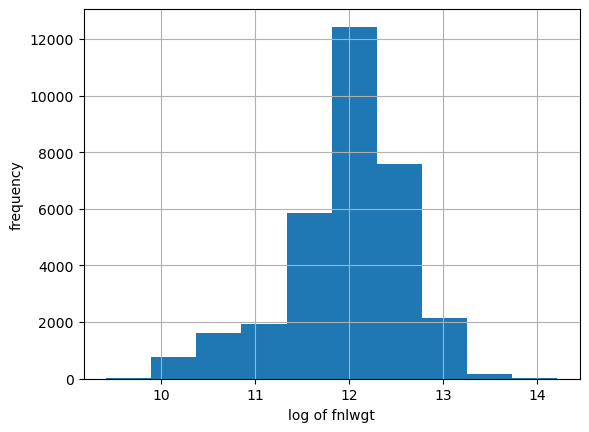

In [144]:
df1['fnlwgt'].hist()
plt.xlabel('log of fnlwgt')
plt.ylabel('frequency')


Scaling the two created feature, using labelencoder for that.


In [148]:
df['education_level'] =  le.fit_transform(df['education_level'] )
df['age_bins'] =  le.fit_transform(df['age_bins'] )

In [149]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Female,Male,<=50K,>50K,age_bins,education_level
0,0.030671,7,-1.063611,9,1.134739,4,0,1,4,0.148453,-0.21666,-0.035429,38,False,True,True,False,1,3
1,0.837109,6,-1.008707,9,1.134739,2,3,0,4,-0.145920,-0.21666,-2.222153,38,False,True,True,False,2,3
2,-0.042642,4,0.245079,11,-0.420060,0,5,1,4,-0.145920,-0.21666,-0.035429,38,False,True,True,False,1,2
3,1.057047,4,0.425801,1,-1.197459,2,5,0,2,-0.145920,-0.21666,-0.035429,38,False,True,True,False,2,2
4,-0.775768,4,1.408176,9,1.134739,2,9,5,2,-0.145920,-0.21666,-0.035429,4,True,False,True,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,12,5,4,-0.145920,-0.21666,-0.197409,38,True,False,True,False,0,3
32557,0.103983,4,-0.335433,11,-0.420060,2,6,0,4,-0.145920,-0.21666,-0.035429,38,False,True,False,True,1,2
32558,1.423610,4,-0.358777,11,-0.420060,6,0,4,4,-0.145920,-0.21666,-0.035429,38,True,False,True,False,2,2
32559,-1.215643,4,0.110960,11,-0.420060,4,0,3,4,-0.145920,-0.21666,-1.655225,38,False,True,True,False,0,2


In [150]:
from sklearn.ensemble import IsolationForest

In [156]:
isolation_forest = IsolationForest( n_estimators = 250 , contamination= 0.05 , random_state= 42)

In [157]:
isolation_forest.fit(df)

C:\Users\Durva\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, n_estimators=250, random_state=42)

In [158]:
df['anomaly'] = isolation_forest.predict(df)

In [168]:
#outliers
outliers_index = df[df['anomaly'] == -1].index
outliers_index

Index([], dtype='int64')

In [165]:
# dropping outliers
df.drop(index= outliers_index , inplace= True)

In [167]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Female,Male,<=50K,>50K,age_bins,education_level,anomaly
0,0.030671,7,-1.063611,9,1.134739,4,0,1,4,0.148453,-0.21666,-0.035429,38,False,True,True,False,1,3,1
1,0.837109,6,-1.008707,9,1.134739,2,3,0,4,-0.145920,-0.21666,-2.222153,38,False,True,True,False,2,3,1
2,-0.042642,4,0.245079,11,-0.420060,0,5,1,4,-0.145920,-0.21666,-0.035429,38,False,True,True,False,1,2,1
3,1.057047,4,0.425801,1,-1.197459,2,5,0,2,-0.145920,-0.21666,-0.035429,38,False,True,True,False,2,2,1
5,-0.115955,4,0.898201,12,1.523438,2,3,5,4,-0.145920,-0.21666,-0.035429,38,True,False,True,False,1,0,1


In [169]:
import ppscore as pps

In [174]:
pps_matrix = pps.matrix(df)

In [176]:
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

In [177]:
pps_pivot

y,<=50K,>50K,Female,Male,age,age_bins,anomaly,capital_gain,capital_loss,education,education_level,education_num,fnlwgt,hours_per_week,marital_status,native_country,occupation,race,relationship,workclass
x,,,,,,,,,,,,,,,,,,,,
<=50K,1.000000e+00,1.000000e+00,0.000000,0.000000,0.030468,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.016278,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
>50K,1.000000e+00,1.000000e+00,0.000000,0.000000,0.030468,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.016278,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
Female,1.351110e-07,1.351110e-07,1.000000,1.000000,0.000410,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.123453,0.000000
Male,1.351110e-07,1.351110e-07,1.000000,1.000000,0.000410,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.123453,0.000000
age,0.000000e+00,0.000000e+00,0.011946,0.027135,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.166650,0.0,0.000000,0.0,0.033322,0.000000
age_bins,1.351110e-07,1.351110e-07,0.000000,0.000000,0.674905,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.141136,0.0,0.003389,0.0,0.000289,0.000000
anomaly,1.351110e-07,1.351110e-07,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
capital_gain,2.698180e-01,2.698180e-01,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
capital_loss,1.204628e-01,1.212693e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


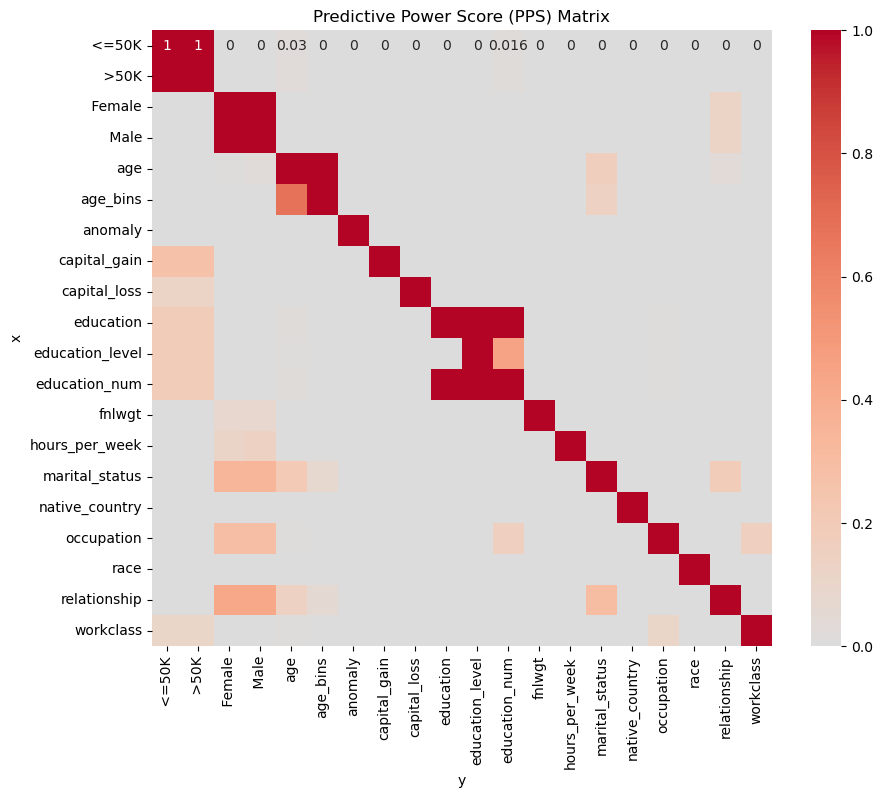

In [180]:
# Plot PPS matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, annot=True, cmap='coolwarm' , center = 0)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

C:\Users\Durva\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


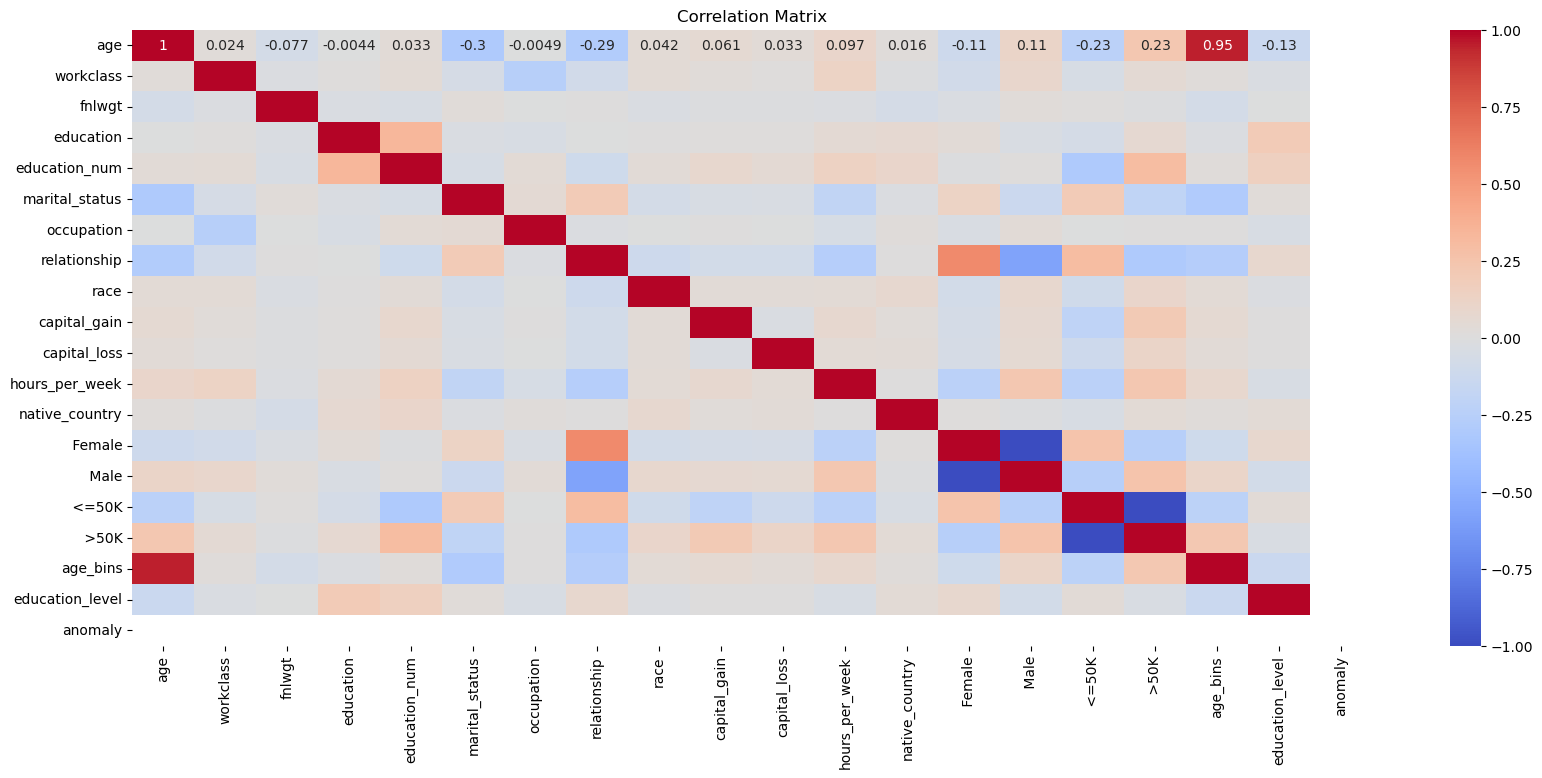

In [182]:
# Plot correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

PPS offers a broader perspective on feature relationships by capturing non-linear dependencies, while correlation focuses solely on linear relationships.
Correlation is simpler and easier to interpret but might miss complex interactions that PPS can reveal.
Visualization of both matrices helps in understanding the relationships between features and can guide feature selection and engineering for machine learning models.